<a href="https://colab.research.google.com/github/amandasbassani/Notebooks_Visao_Computacional/blob/main/T1_Vis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T1 - Movimento de Corpo Rígido e Projeção Perspectiva (Visão Computacional - 2022/1)

Amanda Schneider Bassani


# Primeira parte - Funções e inicialização de variáveis

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi,cos,sin
import numpy as np
from IPython import get_ipython
%matplotlib inline

def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')
    
    ax.set_title("camera reference")
    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

def draw_arrows(point,base,axis,length=1.5):
    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)
    return axis 

def move(dx,dy,dz):
    T = np.eye(4)
    T[0,-1] = dx
    T[1,-1] = dy
    T[2,-1] = dz
    return T

def x_rotation(angle):
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    return rotation_matrix

def y_rotation(angle):
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    return rotation_matrix

def z_rotation(angle):
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    return rotation_matrix

def change_cam2world (M,point_cam):
      p_world = np.dot(M,point_cam)
      return p_world

def change_world2cam (M,point_world):
      M_inv = np.linalg.inv(M)
      p_cam = np.dot(M_inv,point_world)
      return p_cam



### Setting printing options 
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)  


# base de vetores
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

# ponto de origem
point = np.array([[0],[0],[0],[1]])

# base da câmera (na origem do mundo)
cam_base  = np.hstack([base,point])

# Criação da caixa
box = np.array([[   5.0000,   7.5000,        0],
                [   5.0000,   3.5000,        0], # início furo
                [   5.0000,   3.5000,   2.0000],
                [   5.0000,  -3.5000,   2.0000],
                [   5.0000,  -3.5000,        0], # fim
                [   5.0000,  -7.5000,        0], 
                [  -5.0000,  -7.5000,        0], 
                [  -5.0000,   7.5000,        0],
                [   5.0000,   7.5000,        0],
                [   5.0000,   7.5000,   7.5000],
                [   5.0000,  -7.5000,   7.5000],
                [  -5.0000,  -7.5000,   7.5000],
                [  -5.0000,   7.5000,   7.5000],
                [   5.0000,   7.5000,   7.5000],
                [  -5.0000,   7.5000,   7.5000],
                [  -5.0000,   7.5000,        0],
                [  -5.0000,  -7.5000,        0],
                [  -5.0000,  -7.5000,   7.5000],
                [   5.0000,  -7.5000,   7.5000],
                [   5.0000,  -7.5000,        0],
                [   5.0000,  -7.5000,   7.5000],
                [   5.0000, -11.0000,   4.0000],
                [  -5.0000, -11.0000,   4.0000],
                [  -5.0000,  -7.5000,   7.5000],
                [  -8.5000,  -7.5000,   9.5000], # inicio aba atrás do furo
                [  -8.5000,   7.5000,   9.5000],
                [  -5.0000,   7.5000,   7.5000], #fim
                [  -5.0000,  11.0000,   4.0000],
                [   5.0000,  11.0000,   4.0000],
                [   5.0000,   7.5000,   7.5000],
                [   8.5000,   7.5000,   4.0000],
                [   8.5000,  -7.5000,   4.0000],
                [   5.0000,  -7.5000,   7.5000]])

box = np.transpose(box)

#add a vector of ones to the box matrix to represent the box in homogeneous coordinates
box = np.vstack([box, np.ones(np.size(box,1))])

# Caixa da câmera
cam_box = np.array([[ 3.5000,  2.5000,      0],
                    [ 3.5000, -2.5000,      0],
                    [-3.5000, -2.5000,      0],
                    [-3.5000,  2.5000,      0],
                    [ 3.5000,  2.5000,      0]])

cam_box = np.transpose(cam_box)
cam_box = np.vstack([cam_box, np.ones(np.size(cam_box,1))])

# Posição inicial da câmera (definido pelo usuário)
T_co = move(20,0,3.75)
Rx_co = x_rotation(-pi/2)
Ry_co = y_rotation(0)
Rz_co = z_rotation(pi/2)
M_co = np.dot(T_co,np.dot(Rz_co,np.dot(Ry_co,Rx_co)))

# ponto de partida da câmera (eixo e caixa)
cam_origem = np.dot(M_co,cam_base)
cam_boxo = np.dot(M_co,cam_box)
print(cam_box)

# Inicialização das variaveis
cam = cam_origem
cam_box = cam_boxo
M_c_anterior = x_rotation(0)
M_w_anterior = x_rotation(0)


[[ 3.5  3.5 -3.5 -3.5  3.5]
 [ 2.5 -2.5 -2.5  2.5  2.5]
 [ 0.   0.   0.   0.   0. ]
 [ 1.   1.   1.   1.   1. ]]


# Segunda parte - Transformações e Plots

(4, 5)


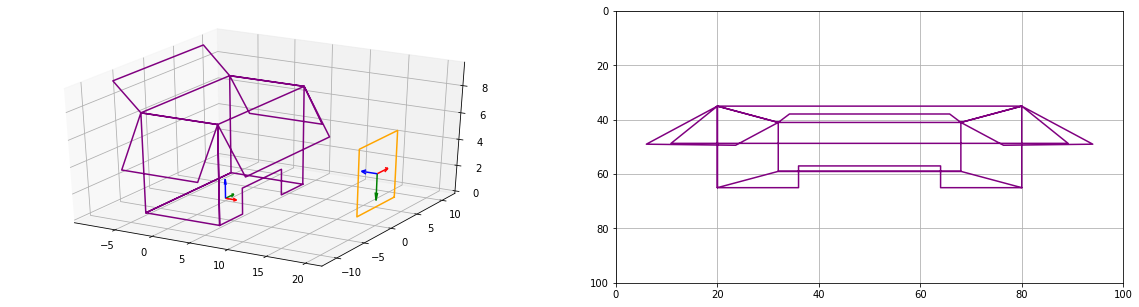

In [2]:
#@title Definição de parâmetros { run: "auto" }

#@markdown Translação da câmera no referencial do mundo
translation_xw = 0 #@param {type:"slider", min:-100, max:100, step:1}
translation_yw = 0 #@param {type:"slider", min:-100, max:100, step:1}
translation_zw = 0 #@param {type:"slider", min:-100, max:100, step:1}

#@markdown Rotação da câmera no referencial do mundo
angle_xw = 0 #@param {type:"slider", min:-180, max:180, step:1}
angle_xw = angle_xw * pi / 180
angle_yw = 0 #@param {type:"slider", min:-180, max:180, step:1}
angle_yw = angle_yw * pi / 180
angle_zw = 0 #@param {type:"slider", min:-180, max:180, step:1}
angle_zw = angle_zw * pi / 180

#@markdown Translação da câmera no referencial da câmera
translation_xc = 0 #@param {type:"slider", min:-100, max:100, step:1}
translation_yc = 0 #@param {type:"slider", min:-100, max:100, step:1}
translation_zc = 0 #@param {type:"slider", min:-100, max:100, step:1}

#@markdown Rotação da câmera no referencial da câmera
angle_xc = 0 #@param {type:"slider", min:-180, max:180, step:1}
angle_xc = angle_xc * pi / 180
angle_yc = 0 #@param {type:"slider", min:-180, max:180, step:1}
angle_yc = angle_yc * pi / 180
angle_zc = 0 #@param {type:"slider", min:-180, max:180, step:1}
angle_zc = angle_zc * pi / 180


#@markdown Escala da imagem plotada
scale = 1 #@param {type:"slider", min:0, max:10, step:0.01}
#@markdown Dimensões da imagem (eixos X e Y)
dimx = 100 #@param {type:"slider", min:1, max:1000, step:1}
dimy = 100 #@param {type:"slider", min:1, max:1000, step:1}
#@markdown Distância focal
f = 60 #@param {type:"slider", min:10, max:100, step:1}

#@markdown Para voltar a posição inicial: 

#@markdown 1) Zere os parâmetros; 

#@markdown 2) Marque a opção reset e rode o código;

#@markdown 3) Desmarque para executar novas transformações.
reset = False #@param {type:"boolean"}


if reset == True:
    new_cam = cam_origem
    new_cam_box = cam_boxo
    M_c_anterior = x_rotation(0)
    M_w_anterior = x_rotation(0)


# Transformação camera em relação ao MUNDO
T_w = move(translation_xw,translation_yw,translation_zw)
Rx_w = x_rotation(angle_xw)
Ry_w = y_rotation(angle_yw)
Rz_w = z_rotation(angle_zw)

# Matriz de transformações
M_w = np.dot(M_w_anterior,np.dot(T_w,np.dot(Rz_w,np.dot(Ry_w,Rx_w))))

# Transformação camera em relação a CÂMERA
T_c = move(translation_xc,translation_yc,translation_zc)
Rx_c = x_rotation(angle_xc)
Ry_c = y_rotation(angle_yc)
Rz_c = z_rotation(angle_zc)

# Matriz de transformação
M_clinha = np.dot(M_c_anterior,np.dot(T_c,np.dot(Rx_c,np.dot(Ry_c,Rz_c))))
M_c = np.dot(M_w,np.dot(M_co,np.dot(M_clinha,np.linalg.inv(M_co))))

# informações para plotagem
new_cam = np.dot(M_c,cam_origem)
new_cam_box = np.dot(M_c,cam_boxo)

# ponto da nova camera em relação ao mundo
new_cam_point = np.transpose([new_cam[:,3]])


# guardar as transformações passadas
M_c_anterior = M_clinha
M_w_anterior = M_w


# matriz de transformações total
M_t = np.dot(M_c,M_co)

# convertendo as coordenadas da caixa do mundo para a câmera
box_w2c = change_world2cam(M_t,box)

# transformações para plotar a imagem
# cisalhamento do pixel
s_theta = 0
# dimensão da imagem em X
s_x = scale
# dimensão da imagem em Y
s_y = scale
# ponto central da imagem
o_x = dimx/2
o_y = dimy/2
# Matriz de transformações intrínsecas
M_i = np.array([[f*s_x, f*s_theta, o_x],[0, f*s_y, o_y],[0, 0, 1]])

# Matriz de projeção canônica (3x4)
base2 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])


# Pontos 2D da imagem (3x1)
P_im = np.dot(M_i,np.dot(base2,box_w2c))
P_im[0] = P_im[0]/P_im[2]
P_im[1] = P_im[1]/P_im[2]
P_im[2] = P_im[2]/P_im[2]

# definindo os pontos do eixo X e Y para plotagem
xline = P_im[0,:]
yline = P_im[1,:]

# Criar subfiguras
fig = plt.figure(figsize=[20,5])

# Plot 3D
ax1 = fig.add_subplot(1,2,1, projection='3d')
# caixa
ax1.plot3D(box[0,:], box[1,:], box[2,:], 'purple')
#ax1.scatter(box[0,0], box[1,0], box[2,0],'b')  # Marca o canto da caixa 
draw_arrows(point,base,ax1)#,length=1)
ax1 = draw_arrows(new_cam[:,3],new_cam[:,0:3],ax1,length=2)
print(new_cam_box.shape)
ax1.plot3D(new_cam_box[0,:], new_cam_box[1,:], new_cam_box[2,:], 'orange')

# Plot 2D
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([0,dimx])
ax2.set_ylim([0,dimy])
ax2.plot(xline,yline,'purple')
# inverte o eixo y
ax2.invert_yaxis()
ax2.grid()

# Show the plots 
plt.show()


